In [3]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
import scipy.linalg as lg
from scipy.optimize import curve_fit

In [4]:
dt = 0.0001
t = 4.0000
step = int(t/dt)
fns = 100
hbar = 1 
gamma = 2
w_t = 1.0 * 2 * np.pi
nth = 0.63
tlist = np.arange(0,4.0001,dt)
print(tlist.shape)
print(step)

(40001,)
40000


In [5]:
def a(n):
    '''
        returns the annihilation operator for maximum n photons
    '''
    a = np.zeros((n+1,n+1))
    b = np.arange(1,n+1)
    np.fill_diagonal(a[:,1:],np.sqrt(b))
    return a

def adagger(n):
    '''
        returns the creation operator for maximum n photons
    '''
    return a(n).conj().T



In [6]:
c_1 = np.sqrt(gamma * (1 + nth)) * a(1)
c_2 = np.sqrt(gamma * nth) * adagger(1)

# creating time evolution operator when no jump happens 


H = w_t * np.dot(adagger(1),a(1))
print(np.dot(adagger(1),a(1)))
H_eff = H - ((1j)*hbar*gamma)/2 * np.dot(adagger(1),a(1)) 
#H_eff = H - ((1j)*hbar)/2 * (np.dot(c_1.conj().T,c_1)+ np.dot(c_2.conj().T,c_2))
U = np.eye(2) - ((1j)*dt)/hbar * H_eff
print(H)
print("H_eff =",H_eff)
print(U)

# L operator

L = np.sqrt(gamma) * a(1)
print(L)

U2 = np.array([[1- gamma*dt, -3*1j * gamma*dt ],[-3*1j*gamma*dt, 1]],dtype = complex)
L2 = np.array([[0,0],[2*np.sqrt(gamma),0]],dtype = complex)
print("U2 =", U2)

[[0. 0.]
 [0. 1.]]
[[0.         0.        ]
 [0.         6.28318531]]
H_eff = [[0.        +0.j 0.        +0.j]
 [0.        +0.j 6.28318531-1.j]]
[[1.    +0.j         0.    +0.j        ]
 [0.    +0.j         0.9999-0.00062832j]]
[[0.         1.41421356]
 [0.         0.        ]]
U2 = [[0.9998+0.j     0.    -0.0006j]
 [0.    -0.0006j 1.    +0.j    ]]


In [10]:
# initialising the wave function 
psi_0 = np.array([[0],[1]])

#dp = gamma*dt* psi_0[1,0]**2

#print(np.dot(L,psi_0)/np.sqrt(dp/dt))

# initial evolution 

#psi_f = np.zeros((2,1))
print(psi_0)
#psi_f = np.dot(U,psi_0)
#print(psi_f)
#k = lg.norm(psi_f)
#print(k)


[[0]
 [1]]


In [41]:
#H = np.array([[-1*1j*hbar*gamma*(1/2), -3*hbar*gamma],[ -3*hbar*gamma, 0]])
print(H)
#k = (1/hbar) * H
#U = np.eye(2) - 1j * (1/hbar)* dt * H
U_dagger = U.conj().T




[[0.         0.        ]
 [0.         6.28318531]]


(200, 40001)


/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:40: ComplexWarning: Casting complex values to real discards the imaginary part


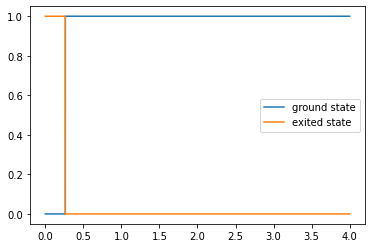

In [42]:
def QMCWF(U,L,psi_0,step):
    
    psi_f = psi_0
    psi_n = psi_0
    prob_g = np.zeros(step+1)
    prob_e = np.zeros(step+1)
    prob_g[0] = abs(psi_0[0,0])**2
    prob_e[0] = abs(psi_0[1,0])**2
    
    for t in range(step):
        size = np.dot(np.dot(psi_0.conj().T,U_dagger),np.dot(U,psi_0))
        no_jump_prob = float(size[0,0])
        epsilon = random.rand()
        if epsilon < no_jump_prob :
            psi_f = np.dot(U,psi_0)
            psi_n = psi_f/np.sqrt(1-dp)
            prob_g[t+1] = abs(psi_n[0,0])**2
            
            prob_e[t+1] = abs(psi_n[1,0])**2
            psi_0 = psi_n
        else :
            psi_n = np.dot(L,psi_0)/np.sqrt(dp/dt)
            prob_g[t+1] = abs(psi_n[0,0])**2
            prob_e[t+1] = abs(psi_n[1,0])**2
            prob_g[t+2:step+2] = 1
            break
    print(prob_g.shape)
    return psi_n,prob_g,prob_e

def QMCWF2(U,L,psi_0i,step):
    
    psi_f = psi_0i
    psi_n = psi_0i
    prob_g = np.zeros(step+1)
    prob_e = np.zeros(step+1)
    prob_g[0] = abs(psi_0i[0,0])**2
    prob_e[0] = abs(psi_0i[1,0])**2
    for t in range(step):
        size = np.dot(np.dot(psi_0i.conj().T,U_dagger),np.dot(U,psi_0i))
        jump_prob = 1.0 - float(size[0,0])
        #print(size)
        epsilon = random.rand()
        if epsilon > jump_prob:
            psi_f = np.dot(U,psi_0i)
            psi_n = psi_f/lg.norm(psi_f)
            #print(psi_n)
            prob_g[t+1] = abs(psi_n[0,0])**2
            prob_e[t+1] = abs(psi_n[1,0])**2
            psi_0i = psi_n
        else :
            psi_f = np.dot(L,psi_0i)
            psi_n = psi_f/lg.norm(psi_f)
            prob_g[t+1] = abs(psi_n[0,0])**2
            prob_e[t+1] = abs(psi_n[1,0])**2
            prob_g[t+2:step+2] = 1
            break
    return prob_g,prob_e
print(np.zeros((200,step+1)).shape)  
ground_prob,exited_prob = QMCWF2(U,L,psi_0,step)
plt.plot(tlist,ground_prob,label = "ground state")
plt.plot(tlist,exited_prob, label = "exited state")
plt.legend()

/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:40: ComplexWarning: Casting complex values to real discards the imaginary part


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


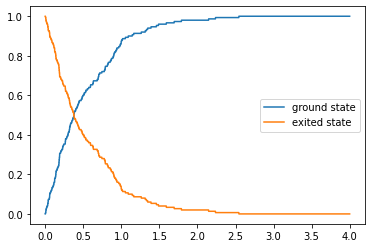

In [43]:
# number of iterations
N_iter = 150

ground_prob = np.zeros((N_iter,step+1))
exited_prob = np.zeros((N_iter,step+1))
for i in range(N_iter):
    ground_prob[i,:],exited_prob[i,:] = QMCWF2(U,L,psi_0,step)

ground_avg = np.zeros(step+1)
exited_avg = np.zeros(step+1)

print( ground_prob[:,1])
print(exited_prob[:,1])
for i in range(step+1):
    ground_avg[i] = np.sum(ground_prob[:,i])/N_iter
    exited_avg[i] = np.sum(exited_prob[:,i])/N_iter
    

plt.plot(tlist,ground_avg,label = "ground state")
plt.plot(tlist,exited_avg, label = "exited state")
plt.legend()


(40001,)
(40001,)
[ 1.03092548 -1.90173408]
comparing the gamma = 1 theoretical value with the simulation =  1.9017340839778123


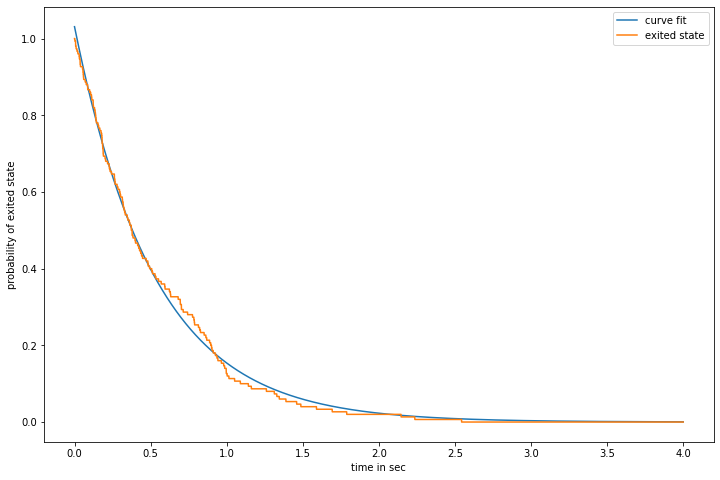

In [44]:
print(tlist.shape)
print(exited_avg.shape)
def test(x, a, b):
    return a*np.exp(b*x)
 
param, param_cov = curve_fit(test, tlist, exited_avg)
print(param)
fig = plt.figure(figsize=(12, 8))
plt.plot(tlist,param[0]*np.exp(param[1]*tlist), label = "curve fit")
plt.plot(tlist,exited_avg, label = "exited state")
plt.xlabel("time in sec")
plt.ylabel("probability of exited state")
plt.legend()
print("comparing the gamma = 1 theoretical value with the simulation = ",-param[1])

### it could have been more accurate with bigger steps. 

In [31]:
# now for the more general part of quantum monte carlo 
psi_0 = np.array([[1/np.sqrt(2)],[1/np.sqrt(2)]])
gamma = 1
hbar = 1
nth = 0.063
c_1 = np.sqrt(gamma * (1 + nth)) * a(1)
c_2 = np.sqrt(gamma * nth) * adagger(1)
c_3 = np.array([c_1,c_2])
dt = 0.0001
t = 4.0000
step = int(t/dt)
tlist = np.arange(0,4.0001,dt)
w_t = 1.0 * 2 * np.pi
H = w_t * np.dot(adagger(1),a(1))
H_eff = H - ((1j)*hbar)/2 * (np.dot(c_1.conj().T,c_1)+ np.dot(c_2.conj().T,c_2))
U = np.eye(2) - ((1j)*dt)/hbar * H_eff
U_dagger = U.conj().T

print(tlist.shape)

print(step)
print(c_3.shape)
print(psi_0)

(40001,)
40000
(2, 2, 2)
[[0.70710678]
 [0.70710678]]


In [33]:
def QMCWF3(U,L,psi_0i,step):
    
    psi_f = psi_0i
    psi_n = psi_0i
    prob_g = np.zeros(step+1)
    prob_e = np.zeros(step+1)
    prob_g[0] = abs(psi_0i[0,0])**2
    prob_e[0] = abs(psi_0i[1,0])**2
    for t in range(step):
        size = np.dot(np.dot(psi_0i.conj().T,U_dagger),np.dot(U,psi_0i))
        jump_prob = 1.0 - float(size[0,0])
        #print(jump_prob)
        
        epsilon = random.rand()
        if epsilon > jump_prob:
            psi_f = np.dot(U,psi_0i)
            psi_n = psi_f/(lg.norm(psi_f))
            #print(abs(psi_n[1,0])**2)
            prob_g[t+1] = abs(psi_n[0,0])**2
            prob_e[t+1] = abs(psi_n[1,0])**2
            psi_0i = psi_n
        else :
            cum_pro = 0
            dpm = 0
            count = 0
            for K in range(2):
                psi_f = np.dot(L[K,:,:],psi_0i)
                dpm = dt* np.abs(np.dot(psi_f.conj().T,psi_f ))
                print(dt* np.abs(np.dot(psi_f.conj().T,psi_f)))
                cum_pro += dpm
                count += 1
                if epsilon < cum_pro:
                    psi_f /= np.sqrt(dpm / dt)
                    psi_n = psi_f
                    prob_g[t+1] = abs(psi_n[0,0])**2
                    prob_e[t+1] = abs(psi_n[1,0])**2
                    psi_0i = psi_n
                    break
            if count == 1:
               prob_g[t+2:step+2] = 1 
               
                     
    return prob_g,prob_e
            

In [ ]:
k_1 = np.dot(np.dot(psi_0i.conj().T,c_1.conj().T),np.dot(c_1,psi_0i))
            
            k_2 = np.dot(np.dot(psi_0i.conj().T,c_2.conj().T),np.dot(c_2,psi_0i))
            K_3 = dt*float(k_1[0,0]) + dt*float(k_2[0,0])
            print("k_1 = ",dt*float(k_1[0,0]))
            print("k_2 = ",dt*float(k_2[0,0]))
            C = np.random.choice([0,1], size = None, p = [dt*float(k_1[0,0])/K_3,dt*float(k_2[0,0])/K_3])
            if C == 0:
                psi_f = np.dot(c_1,psi_0i)
                psi_n = psi_f/lg.norm(psi_f)
                prob_g[t+1] = abs(psi_n[0,0])**2
                prob_e[t+1] = abs(psi_n[1,0])**2
                prob_g[t+2:step+2] = 1
                break
            else :
                psi_f = np.dot(c_2,psi_0i)
                psi_n = psi_f/lg.norm(psi_f)
                prob_g[t+1] = abs(psi_n[0,0])**2
                prob_e[t+1] = abs(psi_n[1,0])**2
                prob_g[t+2:step+2] = 1
                break
    return prob_g,prob_e

/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  # This is added back by InteractiveShellApp.init_path()


[[5.19034529e-05]]
[[0.]]
[[6.3e-06]]
[[0.0001063]]
[0.5000249]
[0.4999751]


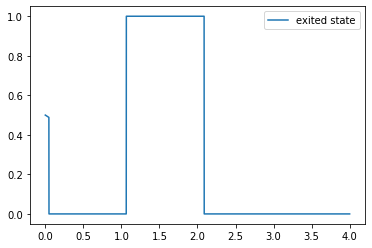

In [38]:
# number of iterations
N_iter = 1

ground_prob = np.zeros((N_iter,step+1))
exited_prob = np.zeros((N_iter,step+1))
for i in range(N_iter):
    ground_prob[i,:],exited_prob[i,:] = QMCWF3(U,c_3,psi_0,step)

ground_avg = np.zeros(step+1)
exited_avg = np.zeros(step+1)

print( ground_prob[:,1])
print(exited_prob[:,1])
for i in range(step+1):
    ground_avg[i] = np.sum(ground_prob[:,i])/N_iter
    exited_avg[i] = np.sum(exited_prob[:,i])/N_iter
    

#plt.plot(tlist,ground_avg,label = "ground state")
plt.plot(tlist,exited_avg, label = "exited state")
plt.legend()

* Next goal is to check for state psi_0 = [0,1], how the probabilities are changing over the time step. and why in that way.
* Try writing the code in another way(using Wave function monte carlo github repo) and compare with your code answer for above statement. 
* look into the lecture notes from quantum optics also the lecture 30.

In [7]:
uncertainty = np.std(exited_prob, 0)/np.sqrt(N_iter)
fig, ax = plt.subplots(nrows=1, ncols=2)
ax.errorbar(tlist, np.mean(exited_prob, 0), uncertainty)
ax.plot(tlist, np.mean(exited_prob, 0), 'r')  # Center line plotted in red for clarity
ax.set_title("Average of %i Trajectories" % N_iter)
ax.set_xlabel("Time")
ax.set_ylim(0, 1)

NameError: name 'exited_prob' is not defined

In [191]:
psi_0 = np.array([[0], [1]])
rho = np.kron(psi_0.T,psi_0)/lg.norm(psi_0)
print(rho)
H = w_t * np.dot(adagger(1),a(1))

def density1(rho):
    n = np.dot(adagger(1),a(1))
    a_arho = np.dot(np.dot(adagger(1),a(1)),rho)
    rhoa_a = np.dot(np.dot(rho,adagger(1)),a(1))
    arhoa_ = np.dot(np.dot(a(1),rho),adagger(1))
    aa_rho = np.dot(np.dot(a(1),adagger(1)),rho)
    rhoaa_ = np.dot(np.dot(rho,a(1)),adagger(1))
    a_rhoa = np.dot(np.dot(adagger(1),rho),a(1))

    first_n1 = a_arho + rhoa_a -2 * arhoa_
    second_n = aa_rho + rhoaa_ -2 * a_rhoa
    L = -gamma*(nth + 1)/2 * first_n1 - gamma * nth * second_n
    #print(L)
    H_new = -(1j)/hbar * (np.dot(H,rho) - np.dot(rho,H))
    rho_dot = np.zeros([2,2])
    rho_dot = H_new + L
    #print(rho_dot)
    
    rho_new = rho_dot
    return rho_new
print(density1(rho))

[[0. 0.]
 [0. 1.]]
[[ 3.26+0.j  0.  +0.j]
 [ 0.  +0.j -3.26+0.j]]


4000
[[0. 0.]
 [0. 1.]]
[[0. 0.]
 [0. 1.]]
[[0.0032506 0.       ]
 [0.        0.9967494]]
[[0.00648772 0.        ]
 [0.         0.99351228]]
[[0.00971136 0.        ]
 [0.         0.99028864]]
[[0.01292154 0.        ]
 [0.         0.98707846]]
[[0.01611825 0.        ]
 [0.         0.98388175]]
[[0.0193015 0.       ]
 [0.        0.9806985]]
[[0.02247129 0.        ]
 [0.         0.97752871]]
[[0.02562763 0.        ]
 [0.         0.97437237]]
[[0.02877052 0.        ]
 [0.         0.97122948]]
[[0.03189997 0.        ]
 [0.         0.96810003]]
[[0.03501599 0.        ]
 [0.         0.96498401]]


/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part


[[0.03811858 0.        ]
 [0.         0.96188142]]
[[0.04120775 0.        ]
 [0.         0.95879225]]
[[0.0442835 0.       ]
 [0.        0.9557165]]
[[0.04734585 0.        ]
 [0.         0.95265415]]
[[0.05039479 0.        ]
 [0.         0.94960521]]
[[0.05343034 0.        ]
 [0.         0.94656966]]
[[0.05645251 0.        ]
 [0.         0.94354749]]
[[0.0594613 0.       ]
 [0.        0.9405387]]
[[0.06245672 0.        ]
 [0.         0.93754328]]
[[0.06543879 0.        ]
 [0.         0.93456121]]
[[0.06840751 0.        ]
 [0.         0.93159249]]
[[0.07136289 0.        ]
 [0.         0.92863711]]
[[0.07430494 0.        ]
 [0.         0.92569506]]
[[0.07723367 0.        ]
 [0.         0.92276633]]
[[0.0801491 0.       ]
 [0.        0.9198509]]
[[0.08305124 0.        ]
 [0.         0.91694876]]
[[0.08594009 0.        ]
 [0.         0.91405991]]
[[0.08881567 0.        ]
 [0.         0.91118433]]
[[0.09167799 0.        ]
 [0.         0.90832201]]
[[0.09452706 0.        ]
 [0.         0.905

[[0.38601212 0.        ]
 [0.         0.61398788]]
[[0.38721675 0.        ]
 [0.         0.61278325]]
[[0.38841354 0.        ]
 [0.         0.61158646]]
[[0.38960253 0.        ]
 [0.         0.61039747]]
[[0.39078377 0.        ]
 [0.         0.60921623]]
[[0.3919573 0.       ]
 [0.        0.6080427]]
[[0.39312316 0.        ]
 [0.         0.60687684]]
[[0.3942814 0.       ]
 [0.        0.6057186]]
[[0.39543206 0.        ]
 [0.         0.60456794]]
[[0.39657519 0.        ]
 [0.         0.60342481]]
[[0.39771082 0.        ]
 [0.         0.60228918]]
[[0.398839 0.      ]
 [0.       0.601161]]
[[0.39995978 0.        ]
 [0.         0.60004022]]
[[0.40107319 0.        ]
 [0.         0.59892681]]
[[0.40217928 0.        ]
 [0.         0.59782072]]
[[0.40327809 0.        ]
 [0.         0.59672191]]
[[0.40436967 0.        ]
 [0.         0.59563033]]
[[0.40545406 0.        ]
 [0.         0.59454594]]
[[0.40653129 0.        ]
 [0.         0.59346871]]
[[0.40760141 0.        ]
 [0.         0.5923985

[[0.50619509 0.        ]
 [0.         0.49380491]]
[[0.50659135 0.        ]
 [0.         0.49340865]]
[[0.50698489 0.        ]
 [0.         0.49301511]]
[[0.50737574 0.        ]
 [0.         0.49262426]]
[[0.5077639 0.       ]
 [0.        0.4922361]]
[[0.50814941 0.        ]
 [0.         0.49185059]]
[[0.50853226 0.        ]
 [0.         0.49146774]]
[[0.5089125 0.       ]
 [0.        0.4910875]]
[[0.50929012 0.        ]
 [0.         0.49070988]]
[[0.50966515 0.        ]
 [0.         0.49033485]]
[[0.51003761 0.        ]
 [0.         0.48996239]]
[[0.51040752 0.        ]
 [0.         0.48959248]]
[[0.51077488 0.        ]
 [0.         0.48922512]]
[[0.51113973 0.        ]
 [0.         0.48886027]]
[[0.51150207 0.        ]
 [0.         0.48849793]]
[[0.51186193 0.        ]
 [0.         0.48813807]]
[[0.51221932 0.        ]
 [0.         0.48778068]]
[[0.51257425 0.        ]
 [0.         0.48742575]]
[[0.51292675 0.        ]
 [0.         0.48707325]]
[[0.51327683 0.        ]
 [0.         0

[[0.54527635 0.        ]
 [0.         0.45472365]]
[[0.54540451 0.        ]
 [0.         0.45459549]]
[[0.54553179 0.        ]
 [0.         0.45446821]]
[[0.54565821 0.        ]
 [0.         0.45434179]]
[[0.54578375 0.        ]
 [0.         0.45421625]]
[[0.54590843 0.        ]
 [0.         0.45409157]]
[[0.54603227 0.        ]
 [0.         0.45396773]]
[[0.54615525 0.        ]
 [0.         0.45384475]]
[[0.54627739 0.        ]
 [0.         0.45372261]]
[[0.54639869 0.        ]
 [0.         0.45360131]]
[[0.54651916 0.        ]
 [0.         0.45348084]]
[[0.54663881 0.        ]
 [0.         0.45336119]]
[[0.54675764 0.        ]
 [0.         0.45324236]]
[[0.54687565 0.        ]
 [0.         0.45312435]]
[[0.54699285 0.        ]
 [0.         0.45300715]]
[[0.54710926 0.        ]
 [0.         0.45289074]]
[[0.54722486 0.        ]
 [0.         0.45277514]]
[[0.54733967 0.        ]
 [0.         0.45266033]]
[[0.5474537 0.       ]
 [0.        0.4525463]]
[[0.54756695 0.        ]
 [0.      

[[0.55809372 0.        ]
 [0.         0.44190628]]
[[0.55813416 0.        ]
 [0.         0.44186584]]
[[0.55817432 0.        ]
 [0.         0.44182568]]
[[0.55821421 0.        ]
 [0.         0.44178579]]
[[0.55825383 0.        ]
 [0.         0.44174617]]
[[0.55829317 0.        ]
 [0.         0.44170683]]
[[0.55833225 0.        ]
 [0.         0.44166775]]
[[0.55837106 0.        ]
 [0.         0.44162894]]
[[0.5584096 0.       ]
 [0.        0.4415904]]
[[0.55844788 0.        ]
 [0.         0.44155212]]
[[0.5584859 0.       ]
 [0.        0.4415141]]
[[0.55852366 0.        ]
 [0.         0.44147634]]
[[0.55856116 0.        ]
 [0.         0.44143884]]
[[0.55859841 0.        ]
 [0.         0.44140159]]
[[0.55863539 0.        ]
 [0.         0.44136461]]
[[0.55867213 0.        ]
 [0.         0.44132787]]
[[0.55870862 0.        ]
 [0.         0.44129138]]
[[0.55874485 0.        ]
 [0.         0.44125515]]
[[0.55878084 0.        ]
 [0.         0.44121916]]
[[0.55881659 0.        ]
 [0.         0

[[0.56211572 0.        ]
 [0.         0.43788428]]
[[0.56212868 0.        ]
 [0.         0.43787132]]
[[0.56214155 0.        ]
 [0.         0.43785845]]
[[0.56215434 0.        ]
 [0.         0.43784566]]
[[0.56216703 0.        ]
 [0.         0.43783297]]
[[0.56217964 0.        ]
 [0.         0.43782036]]
[[0.56219217 0.        ]
 [0.         0.43780783]]
[[0.5622046 0.       ]
 [0.        0.4377954]]
[[0.56221696 0.        ]
 [0.         0.43778304]]
[[0.56222922 0.        ]
 [0.         0.43777078]]
[[0.56224141 0.        ]
 [0.         0.43775859]]
[[0.56225351 0.        ]
 [0.         0.43774649]]
[[0.56226553 0.        ]
 [0.         0.43773447]]
[[0.56227746 0.        ]
 [0.         0.43772254]]
[[0.56228932 0.        ]
 [0.         0.43771068]]
[[0.56230109 0.        ]
 [0.         0.43769891]]
[[0.56231279 0.        ]
 [0.         0.43768721]]
[[0.5623244 0.       ]
 [0.        0.4376756]]
[[0.56233594 0.        ]
 [0.         0.43766406]]
[[0.56234739 0.        ]
 [0.         0

[[0.56342957 0.        ]
 [0.         0.43657043]]
[[0.56343356 0.        ]
 [0.         0.43656644]]
[[0.56343752 0.        ]
 [0.         0.43656248]]
[[0.56344146 0.        ]
 [0.         0.43655854]]
[[0.56344537 0.        ]
 [0.         0.43655463]]
[[0.56344925 0.        ]
 [0.         0.43655075]]
[[0.5634531 0.       ]
 [0.        0.4365469]]
[[0.56345693 0.        ]
 [0.         0.43654307]]
[[0.56346073 0.        ]
 [0.         0.43653927]]
[[0.56346451 0.        ]
 [0.         0.43653549]]
[[0.56346826 0.        ]
 [0.         0.43653174]]
[[0.56347198 0.        ]
 [0.         0.43652802]]
[[0.56347568 0.        ]
 [0.         0.43652432]]
[[0.56347935 0.        ]
 [0.         0.43652065]]
[[0.563483 0.      ]
 [0.       0.436517]]
[[0.56348663 0.        ]
 [0.         0.43651337]]
[[0.56349022 0.        ]
 [0.         0.43650978]]
[[0.5634938 0.       ]
 [0.        0.4365062]]
[[0.56349735 0.        ]
 [0.         0.43650265]]
[[0.56350087 0.        ]
 [0.         0.4364991

[[0.56382643 0.        ]
 [0.         0.43617357]]
[[0.56382771 0.        ]
 [0.         0.43617229]]
[[0.56382898 0.        ]
 [0.         0.43617102]]
[[0.56383024 0.        ]
 [0.         0.43616976]]
[[0.56383149 0.        ]
 [0.         0.43616851]]
[[0.56383274 0.        ]
 [0.         0.43616726]]
[[0.56383398 0.        ]
 [0.         0.43616602]]
[[0.5638352 0.       ]
 [0.        0.4361648]]
[[0.56383642 0.        ]
 [0.         0.43616358]]
[[0.56383763 0.        ]
 [0.         0.43616237]]
[[0.56383884 0.        ]
 [0.         0.43616116]]
[[0.56384003 0.        ]
 [0.         0.43615997]]
[[0.56384122 0.        ]
 [0.         0.43615878]]
[[0.5638424 0.       ]
 [0.        0.4361576]]
[[0.56384357 0.        ]
 [0.         0.43615643]]
[[0.56384473 0.        ]
 [0.         0.43615527]]
[[0.56384588 0.        ]
 [0.         0.43615412]]
[[0.56384703 0.        ]
 [0.         0.43615297]]
[[0.56384817 0.        ]
 [0.         0.43615183]]
[[0.5638493 0.       ]
 [0.        0.43

[[0.56395413 0.        ]
 [0.         0.43604587]]
[[0.56395454 0.        ]
 [0.         0.43604546]]
[[0.56395495 0.        ]
 [0.         0.43604505]]
[[0.56395535 0.        ]
 [0.         0.43604465]]
[[0.56395575 0.        ]
 [0.         0.43604425]]
[[0.56395614 0.        ]
 [0.         0.43604386]]
[[0.56395654 0.        ]
 [0.         0.43604346]]
[[0.56395693 0.        ]
 [0.         0.43604307]]
[[0.56395732 0.        ]
 [0.         0.43604268]]
[[0.5639577 0.       ]
 [0.        0.4360423]]
[[0.56395809 0.        ]
 [0.         0.43604191]]
[[0.56395847 0.        ]
 [0.         0.43604153]]
[[0.56395885 0.        ]
 [0.         0.43604115]]
[[0.56395922 0.        ]
 [0.         0.43604078]]
[[0.56395959 0.        ]
 [0.         0.43604041]]
[[0.56395996 0.        ]
 [0.         0.43604004]]
[[0.56396033 0.        ]
 [0.         0.43603967]]
[[0.5639607 0.       ]
 [0.        0.4360393]]
[[0.56396106 0.        ]
 [0.         0.43603894]]
[[0.56396142 0.        ]
 [0.         0

[[0.56399482 0.        ]
 [0.         0.43600518]]
[[0.56399495 0.        ]
 [0.         0.43600505]]
[[0.56399508 0.        ]
 [0.         0.43600492]]
[[0.56399521 0.        ]
 [0.         0.43600479]]
[[0.56399533 0.        ]
 [0.         0.43600467]]
[[0.56399546 0.        ]
 [0.         0.43600454]]
[[0.56399558 0.        ]
 [0.         0.43600442]]
[[0.56399571 0.        ]
 [0.         0.43600429]]
[[0.56399583 0.        ]
 [0.         0.43600417]]
[[0.56399596 0.        ]
 [0.         0.43600404]]
[[0.56399608 0.        ]
 [0.         0.43600392]]
[[0.5639962 0.       ]
 [0.        0.4360038]]
[[0.56399632 0.        ]
 [0.         0.43600368]]
[[0.56399644 0.        ]
 [0.         0.43600356]]
[[0.56399656 0.        ]
 [0.         0.43600344]]
[[0.56399668 0.        ]
 [0.         0.43600332]]
[[0.56399679 0.        ]
 [0.         0.43600321]]
[[0.56399691 0.        ]
 [0.         0.43600309]]
[[0.56399703 0.        ]
 [0.         0.43600297]]
[[0.56399714 0.        ]
 [0.      

[[0.56400782 0.        ]
 [0.         0.43599218]]
[[0.56400786 0.        ]
 [0.         0.43599214]]
[[0.5640079 0.       ]
 [0.        0.4359921]]
[[0.56400794 0.        ]
 [0.         0.43599206]]
[[0.56400798 0.        ]
 [0.         0.43599202]]
[[0.56400802 0.        ]
 [0.         0.43599198]]
[[0.56400806 0.        ]
 [0.         0.43599194]]
[[0.5640081 0.       ]
 [0.        0.4359919]]
[[0.56400814 0.        ]
 [0.         0.43599186]]
[[0.56400818 0.        ]
 [0.         0.43599182]]
[[0.56400822 0.        ]
 [0.         0.43599178]]
[[0.56400826 0.        ]
 [0.         0.43599174]]
[[0.5640083 0.       ]
 [0.        0.4359917]]
[[0.56400833 0.        ]
 [0.         0.43599167]]
[[0.56400837 0.        ]
 [0.         0.43599163]]
[[0.56400841 0.        ]
 [0.         0.43599159]]
[[0.56400845 0.        ]
 [0.         0.43599155]]
[[0.56400848 0.        ]
 [0.         0.43599152]]
[[0.56400852 0.        ]
 [0.         0.43599148]]
[[0.56400856 0.        ]
 [0.         0.435

[[0.56401194 0.        ]
 [0.         0.43598806]]
[[0.56401195 0.        ]
 [0.         0.43598805]]
[[0.56401196 0.        ]
 [0.         0.43598804]]
[[0.56401198 0.        ]
 [0.         0.43598802]]
[[0.56401199 0.        ]
 [0.         0.43598801]]
[[0.564012 0.      ]
 [0.       0.435988]]
[[0.56401201 0.        ]
 [0.         0.43598799]]
[[0.56401203 0.        ]
 [0.         0.43598797]]
[[0.56401204 0.        ]
 [0.         0.43598796]]
[[0.56401205 0.        ]
 [0.         0.43598795]]
[[0.56401206 0.        ]
 [0.         0.43598794]]
[[0.56401207 0.        ]
 [0.         0.43598793]]
[[0.56401209 0.        ]
 [0.         0.43598791]]
[[0.5640121 0.       ]
 [0.        0.4359879]]
[[0.56401211 0.        ]
 [0.         0.43598789]]
[[0.56401212 0.        ]
 [0.         0.43598788]]
[[0.56401213 0.        ]
 [0.         0.43598787]]
[[0.56401215 0.        ]
 [0.         0.43598785]]
[[0.56401216 0.        ]
 [0.         0.43598784]]
[[0.56401217 0.        ]
 [0.         0.435

[[0.56401324 0.        ]
 [0.         0.43598676]]
[[0.56401324 0.        ]
 [0.         0.43598676]]
[[0.56401325 0.        ]
 [0.         0.43598675]]
[[0.56401325 0.        ]
 [0.         0.43598675]]
[[0.56401325 0.        ]
 [0.         0.43598675]]
[[0.56401326 0.        ]
 [0.         0.43598674]]
[[0.56401326 0.        ]
 [0.         0.43598674]]
[[0.56401327 0.        ]
 [0.         0.43598673]]
[[0.56401327 0.        ]
 [0.         0.43598673]]
[[0.56401327 0.        ]
 [0.         0.43598673]]
[[0.56401328 0.        ]
 [0.         0.43598672]]
[[0.56401328 0.        ]
 [0.         0.43598672]]
[[0.56401329 0.        ]
 [0.         0.43598671]]
[[0.56401329 0.        ]
 [0.         0.43598671]]
[[0.56401329 0.        ]
 [0.         0.43598671]]
[[0.5640133 0.       ]
 [0.        0.4359867]]
[[0.5640133 0.       ]
 [0.        0.4359867]]
[[0.5640133 0.       ]
 [0.        0.4359867]]
[[0.56401331 0.        ]
 [0.         0.43598669]]
[[0.56401331 0.        ]
 [0.         0.435

[[0.56401364 0.        ]
 [0.         0.43598636]]
[[0.56401365 0.        ]
 [0.         0.43598635]]
[[0.56401365 0.        ]
 [0.         0.43598635]]
[[0.56401365 0.        ]
 [0.         0.43598635]]
[[0.56401365 0.        ]
 [0.         0.43598635]]
[[0.56401365 0.        ]
 [0.         0.43598635]]
[[0.56401365 0.        ]
 [0.         0.43598635]]
[[0.56401365 0.        ]
 [0.         0.43598635]]
[[0.56401366 0.        ]
 [0.         0.43598634]]
[[0.56401366 0.        ]
 [0.         0.43598634]]
[[0.56401366 0.        ]
 [0.         0.43598634]]
[[0.56401366 0.        ]
 [0.         0.43598634]]
[[0.56401366 0.        ]
 [0.         0.43598634]]
[[0.56401366 0.        ]
 [0.         0.43598634]]
[[0.56401366 0.        ]
 [0.         0.43598634]]
[[0.56401366 0.        ]
 [0.         0.43598634]]
[[0.56401367 0.        ]
 [0.         0.43598633]]
[[0.56401367 0.        ]
 [0.         0.43598633]]
[[0.56401367 0.        ]
 [0.         0.43598633]]
[[0.56401367 0.        ]
 [0.  

[[0.56401378 0.        ]
 [0.         0.43598622]]
[[0.56401378 0.        ]
 [0.         0.43598622]]
[[0.56401378 0.        ]
 [0.         0.43598622]]
[[0.56401378 0.        ]
 [0.         0.43598622]]
[[0.56401378 0.        ]
 [0.         0.43598622]]
[[0.56401378 0.        ]
 [0.         0.43598622]]
[[0.56401378 0.        ]
 [0.         0.43598622]]
[[0.56401378 0.        ]
 [0.         0.43598622]]
[[0.56401378 0.        ]
 [0.         0.43598622]]
[[0.56401378 0.        ]
 [0.         0.43598622]]
[[0.56401378 0.        ]
 [0.         0.43598622]]
[[0.56401378 0.        ]
 [0.         0.43598622]]
[[0.56401378 0.        ]
 [0.         0.43598622]]
[[0.56401378 0.        ]
 [0.         0.43598622]]
[[0.56401378 0.        ]
 [0.         0.43598622]]
[[0.56401378 0.        ]
 [0.         0.43598622]]
[[0.56401379 0.        ]
 [0.         0.43598621]]
[[0.56401379 0.        ]
 [0.         0.43598621]]
[[0.56401379 0.        ]
 [0.         0.43598621]]
[[0.56401379 0.        ]
 [0.  

[[0.56401382 0.        ]
 [0.         0.43598618]]
[[0.56401382 0.        ]
 [0.         0.43598618]]
[[0.56401382 0.        ]
 [0.         0.43598618]]
[[0.56401382 0.        ]
 [0.         0.43598618]]
[[0.56401382 0.        ]
 [0.         0.43598618]]
[[0.56401382 0.        ]
 [0.         0.43598618]]
[[0.56401382 0.        ]
 [0.         0.43598618]]
[[0.56401382 0.        ]
 [0.         0.43598618]]
[[0.56401382 0.        ]
 [0.         0.43598618]]
[[0.56401382 0.        ]
 [0.         0.43598618]]
[[0.56401382 0.        ]
 [0.         0.43598618]]
[[0.56401382 0.        ]
 [0.         0.43598618]]
[[0.56401382 0.        ]
 [0.         0.43598618]]
[[0.56401382 0.        ]
 [0.         0.43598618]]
[[0.56401382 0.        ]
 [0.         0.43598618]]
[[0.56401382 0.        ]
 [0.         0.43598618]]
[[0.56401382 0.        ]
 [0.         0.43598618]]
[[0.56401382 0.        ]
 [0.         0.43598618]]
[[0.56401382 0.        ]
 [0.         0.43598618]]
[[0.56401382 0.        ]
 [0.  

[[0.56401383 0.        ]
 [0.         0.43598617]]
[[0.56401383 0.        ]
 [0.         0.43598617]]
[[0.56401383 0.        ]
 [0.         0.43598617]]
[[0.56401383 0.        ]
 [0.         0.43598617]]
[[0.56401383 0.        ]
 [0.         0.43598617]]
[[0.56401383 0.        ]
 [0.         0.43598617]]
[[0.56401383 0.        ]
 [0.         0.43598617]]
[[0.56401383 0.        ]
 [0.         0.43598617]]
[[0.56401383 0.        ]
 [0.         0.43598617]]
[[0.56401383 0.        ]
 [0.         0.43598617]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.  

[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.  

[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.  

[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.  

[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.  

[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.  

[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.  

[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.         0.43598616]]
[[0.56401384 0.        ]
 [0.  

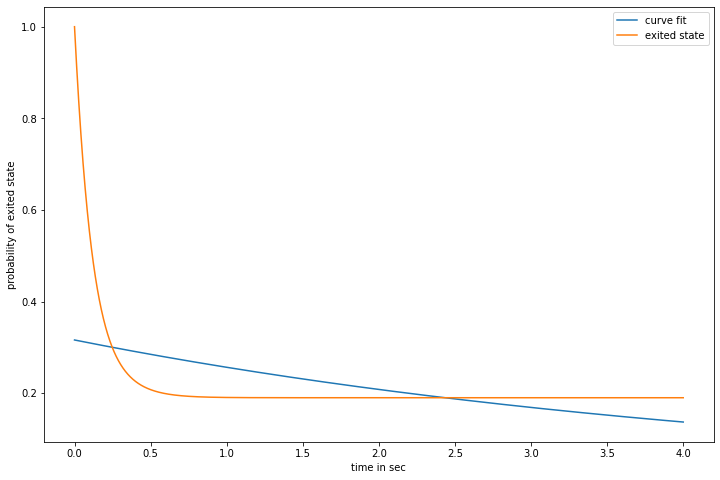

In [193]:
from scipy.integrate import odeint

dt = 0.001
t = 4.0000
tlist = np.arange(0,4.001,dt)
step = int(t/dt)
print(step)
def runge_kutta4(fun,rho,tlist):
    rho_new = np.zeros([tlist.shape[0],2,2])
    rho_new[0,:,:] = rho[:,:]
    print(rho_new[0,:,:])
    for i in np.arange(step+1):
        k1 = fun(rho_new[i,:,:], tlist[i])
        k2 = fun(rho_new[i,:,:] + dt*k1/2,tlist[i]+ dt/2)
        k3 = fun(rho_new[i,:,:] + dt*k2/2, tlist[i]+dt/2)
        k4 = fun(rho_new[i,:,:] + dt *k3, tlist[i]+dt)
        
        dx = dt*(k1+2*k2 + 2*k3+k4)/6
        rho_new[i+1,:,:] = rho_new[i,:,:] + dx/np.sqrt(lg.norm(rho_new[i,:,:]))
        print(rho_new[i,:,:])
    return rho_new

fun = lambda rho,tlist : density1(rho)
rho_new = runge_kutta4(fun, rho,tlist)

ground_prob = np.abs(rho_new[:,0,0])**2
print(ground_prob)
exited_prob = np.abs(rho_new[:,1,1])**2

def test(x, a, b):
    return a*np.exp(b*x)
 
param, param_cov = curve_fit(test, tlist, exited_prob)
print(param)
fig = plt.figure(figsize=(12, 8))
plt.plot(tlist,param[0]*np.exp(param[1]*tlist), label = "curve fit")
plt.plot(tlist,exited_prob, label = "exited state")
plt.xlabel("time in sec")
plt.ylabel("probability of exited state")
plt.legend()
print("comparing the gamma = 1 theoretical value with the simulation = ",-param[1])

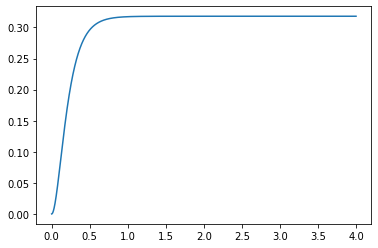

In [194]:
plt.plot(tlist,ground_prob)